<a href="https://colab.research.google.com/github/snwnkang/CS109A_Final/blob/main/Final_Project_CS109.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Operational Energy
Building operational energy is the required energy to run a building once it is occupied and functioning. In contrast to embodied energy, which refers to energy consumed in the production of materials, transportation and construction of the building, operational energy is primarily concerned with the energy consumption during a building's life cycle, and typically it constitutes the majority of any building's Life Cycle Energy (LCE) use.
<br>
<br>
$\Large \frac{(kWh) \: \text{Annual Energy Consumption}}{(m^2) \: \text{Total Floor area}}$
<br>
<br>
#### Energy consuming systems include:

- Space Heating
- Space Cooling
- Ventilation
- Lighting
- Plug Loads
- Water Heating

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [66]:
df = pd.read_csv("https://raw.githubusercontent.com/snwnkang/CS109A_Final/main/data/230421_operational_novent_cleaned_32k.csv")

In [67]:
df.head()

,seed,Equipment,WallType,Orientation,Efficiency,NaturalVentilation,SensibleRate,LatentRate,ThermalPerformance,ThermalMassFlip,...,PumpElectricity [KWh/yr],PumpElecPerArea [KWh/yr/m^2],LightingElectricity [KWh/yr],LightElecPerArea [KWh/yr/m^2],ApplianceElectricity [KWh/yr],ApplianceElecPerArea [KWh/yr/m^2],ApplianceGas [KWh/yr],ApplianceGasPerArea [KWh/yr/m^2],HotWater [KWh/yr],HotWaterPerArea [KWh/yr/m^2]
0,91001,1,3,348,medium,0,0.577611,0.769275,normal,0,...,0.00000,0.000000,102128.0753,48.761679,49736.87014,23.747175,0.0000,0.000000,6977.650054,3.331522
1,91003,5,3,96,medium,0,0.608100,0.700198,high,0,...,47665.60951,11.487335,202331.9820,48.761679,98536.66075,23.747175,0.0000,0.000000,13823.836010,3.331522
2,91004,4,0,182,high,0,0.743813,0.787790,high,0,...,172798.48180,13.536407,301066.7194,23.584477,724209.15370,56.731922,938873.3609,73.547939,340295.030100,26.657480
3,91005,0,0,359,high,0,0.759058,0.794812,high,1,...,0.00000,0.000000,108721.9494,11.131444,313707.18830,32.118759,0.0000,0.000000,268144.972900,27.453894
4,91008,5,1,317,high,0,0.805260,0.812712,normal,0,...,219399.64710,10.991456,510409.9023,25.570450,616842.83520,30.902514,0.0000,0.000000,51150.008010,2.562507


**Verify that there are no missing values**

In this case, the data was produced by our groupmate Lucy, who had already done significant work in cleaning and maintaining the data. We confirm below that there are no *missing values* for any of the columns.

In [68]:
#confirm there are no missing values
df_missingness = df.isna().sum()
df_missingness

seed                                 0
Equipment                            0
WallType                             0
Orientation                          0
Efficiency                           0
NaturalVentilation                   0
SensibleRate                         0
LatentRate                           0
ThermalPerformance                   0
ThermalMassFlip                      0
nonMassWallR [m^2-K/W]               0
MassWallR [m^2-K/W]                  0
RoofR [m^2-K/W]                      0
InteriorFloorR [m^2-K/W]             0
ExteriorFloorR [m^2-K/W]             0
WWRnorth                             0
WWRwest                              0
WWRsouth                             0
WWReast                              0
SHGC                                 0
WindowR [m^2-K/W]                    0
BuildingVolumn [m^3]                 0
TotalFloorArea [m^2]                 0
f2fHeight [m]                        0
numFloor                             0
TotalRoofArea [m^2]      

In [69]:
selected_columns = [
    'program',
    'Equipment',
    'Orientation',
    'nonMassWallR [m^2-K/W]',
    'MassWallR [m^2-K/W]',
    'RoofR [m^2-K/W]',
    'InteriorFloorR [m^2-K/W]',
    'ExteriorFloorR [m^2-K/W]',
    'WWRnorth',
    'WWRwest',
    'WWRsouth',
    'WWReast',
    'SHGC',
    'WindowR [m^2-K/W]',
    'numFloor',
    'AspectRatio',
    'WallType',
    'BuildingVolumn [m^3]',
    'TotalFacadeArea [m^2]',
    'CoolingElecPerArea [KWh/yr/m^2]',
    'HeatingElecPerArea [KWh/yr/m^2]',
    'HeatingGasPerArea [KWh/yr/m^2]',
    'FanElecPerArea [KWh/yr/m^2]',
    'PumpElecPerArea [KWh/yr/m^2]',
    'LightElecPerArea [KWh/yr/m^2]',
    'ApplianceElecPerArea [KWh/yr/m^2]',
    'ApplianceGasPerArea [KWh/yr/m^2]',
    'HotWaterPerArea [KWh/yr/m^2]'
]

In [70]:
df_sel = df.loc[:, selected_columns]
df_sel.head(5)

,program,Equipment,Orientation,nonMassWallR [m^2-K/W],MassWallR [m^2-K/W],RoofR [m^2-K/W],InteriorFloorR [m^2-K/W],ExteriorFloorR [m^2-K/W],WWRnorth,WWRwest,...,TotalFacadeArea [m^2],CoolingElecPerArea [KWh/yr/m^2],HeatingElecPerArea [KWh/yr/m^2],HeatingGasPerArea [KWh/yr/m^2],FanElecPerArea [KWh/yr/m^2],PumpElecPerArea [KWh/yr/m^2],LightElecPerArea [KWh/yr/m^2],ApplianceElecPerArea [KWh/yr/m^2],ApplianceGasPerArea [KWh/yr/m^2],HotWaterPerArea [KWh/yr/m^2]
0,6,1,348,2.88,0.00,8.38,0.7,5.38,0.23,0.11,...,838.42,27.738170,0.655711,0.000000,37.381036,0.000000,48.761679,23.747175,0.000000,3.331522
1,6,5,96,3.58,0.00,10.49,0.7,6.61,0.32,0.24,...,1752.68,29.263610,0.000000,4.925151,6.158374,11.487335,48.761679,23.747175,0.000000,3.331522
2,3,4,182,2.21,0.00,5.52,0.7,3.43,0.38,0.37,...,4870.35,51.284081,0.000689,0.000000,10.425784,13.536407,23.584477,56.731922,73.547939,26.657480
3,5,0,359,0.00,2.03,5.52,0.7,3.08,0.42,0.38,...,6688.49,23.836787,0.000000,1.476935,30.337577,0.000000,11.131444,32.118759,0.000000,27.453894
4,4,5,317,2.02,0.00,4.40,0.7,4.68,0.90,0.90,...,9515.83,34.512464,0.000000,13.066668,7.127550,10.991456,25.570450,30.902514,0.000000,2.562507


In [71]:
df_sel.describe()

,program,Equipment,Orientation,nonMassWallR [m^2-K/W],MassWallR [m^2-K/W],RoofR [m^2-K/W],InteriorFloorR [m^2-K/W],ExteriorFloorR [m^2-K/W],WWRnorth,WWRwest,...,TotalFacadeArea [m^2],CoolingElecPerArea [KWh/yr/m^2],HeatingElecPerArea [KWh/yr/m^2],HeatingGasPerArea [KWh/yr/m^2],FanElecPerArea [KWh/yr/m^2],PumpElecPerArea [KWh/yr/m^2],LightElecPerArea [KWh/yr/m^2],ApplianceElecPerArea [KWh/yr/m^2],ApplianceGasPerArea [KWh/yr/m^2],HotWaterPerArea [KWh/yr/m^2]
count,32500.000000,32500.000000,32500.000000,32500.000000,32500.000000,32500.000000,3.250000e+04,32500.000000,32500.000000,32500.000000,...,32500.000000,32500.000000,32500.000000,32500.000000,32500.000000,32500.000000,32500.000000,32500.000000,32500.000000,32500.000000
mean,4.489169,2.506369,179.894585,2.384207,0.321344,5.930260,7.000000e-01,4.133882,0.516276,0.516068,...,2439.473324,41.590416,0.878257,3.788307,19.568955,6.833864,34.491958,56.094904,37.832367,19.993414
std,2.862389,1.706247,104.237783,1.472428,0.814431,1.614038,1.110240e-16,1.772313,0.264802,0.264985,...,2128.915040,30.595159,2.210626,9.634782,24.345446,7.899791,12.843465,60.938397,75.988763,36.083727
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.760000,7.000000e-01,0.610000,0.100000,0.100000,...,127.920000,0.000000,0.000000,0.000000,0.000000,0.000000,11.131444,7.887766,0.000000,0.000000
25%,2.000000,1.000000,90.000000,1.500000,0.000000,4.640000,7.000000e-01,3.080000,0.290000,0.290000,...,844.535000,23.235079,0.000000,0.000000,4.827764,0.000000,24.195756,23.747175,0.000000,0.965401
50%,4.000000,3.000000,180.000000,2.210000,0.000000,5.520000,7.000000e-01,4.680000,0.480000,0.480000,...,1615.240000,33.703803,0.000000,0.000000,8.058063,6.027070,33.661268,32.118759,0.000000,6.666019
75%,7.000000,4.000000,270.000000,3.580000,0.000000,6.400000,7.000000e-01,5.560000,0.820000,0.820000,...,3558.667500,51.936903,0.536345,2.114257,29.932978,10.104479,48.725984,56.731922,34.790597,26.657480
max,9.000000,5.000000,360.000000,5.520000,3.790000,10.490000,7.000000e-01,6.610000,0.900000,0.900000,...,12857.950000,237.422687,29.362471,117.112497,216.142808,52.081393,52.057494,226.922176,255.286289,124.023484


**Data Imbalance**

Our program variable is a categorical variable, and ranges from 0 - 9, 10 numbers that correspond to the following:

*(The following are ordered, corresponding to 0 - 9)*
- Courthouse
- Full Service Restaurant
- Hospital
- Large Hotel
- Medium Office
- Midrise Apartment
- Retail
- Secondary School
- Supermarket
- Warehouse

Below, we verify that there is a good balance between samples for each program. We do the same for **WallType** which will be an important aspect for prediction later on.

In [72]:
#Data imbalance (confirm that for each program and wall type, there are enough samples)
program_counts = df['program'].value_counts().sort_index()
print(program_counts)

0    3227
1    3257
2    3272
3    3261
4    3236
5    3346
6    3264
7    3261
8    3155
9    3221
Name: program, dtype: int64


In [73]:
program_counts = df['WallType'].value_counts().sort_index()
print(program_counts)

0    10828
1     7231
2     7222
3     7219
Name: WallType, dtype: int64


**New Variable: VolumeToFacadeRatio**

For easier calculations, we create a variable called Volume to Facade Ratio, using the existing building volume and Total Facade Area variables to calculate it, and then we will drop the two.

In [74]:
df_sel['VolumeToFacadeRatio'] = df['BuildingVolumn [m^3]'] / df['TotalFacadeArea [m^2]']

In [75]:
df_sel.head(5)

,program,Equipment,Orientation,nonMassWallR [m^2-K/W],MassWallR [m^2-K/W],RoofR [m^2-K/W],InteriorFloorR [m^2-K/W],ExteriorFloorR [m^2-K/W],WWRnorth,WWRwest,...,CoolingElecPerArea [KWh/yr/m^2],HeatingElecPerArea [KWh/yr/m^2],HeatingGasPerArea [KWh/yr/m^2],FanElecPerArea [KWh/yr/m^2],PumpElecPerArea [KWh/yr/m^2],LightElecPerArea [KWh/yr/m^2],ApplianceElecPerArea [KWh/yr/m^2],ApplianceGasPerArea [KWh/yr/m^2],HotWaterPerArea [KWh/yr/m^2],VolumeToFacadeRatio
0,6,1,348,2.88,0.00,8.38,0.7,5.38,0.23,0.11,...,27.738170,0.655711,0.000000,37.381036,0.000000,48.761679,23.747175,0.000000,3.331522,11.441270
1,6,5,96,3.58,0.00,10.49,0.7,6.61,0.32,0.24,...,29.263610,0.000000,4.925151,6.158374,11.487335,48.761679,23.747175,0.000000,3.331522,11.387247
2,3,4,182,2.21,0.00,5.52,0.7,3.43,0.38,0.37,...,51.284081,0.000689,0.000000,10.425784,13.536407,23.584477,56.731922,73.547939,26.657480,8.153950
3,5,0,359,0.00,2.03,5.52,0.7,3.08,0.42,0.38,...,23.836787,0.000000,1.476935,30.337577,0.000000,11.131444,32.118759,0.000000,27.453894,7.132345
4,4,5,317,2.02,0.00,4.40,0.7,4.68,0.90,0.90,...,34.512464,0.000000,13.066668,7.127550,10.991456,25.570450,30.902514,0.000000,2.562507,9.796224


**New Variable: Operational Energy = 'OE'**

To calculate the Operational energy (refer to the formula at the beginning) we will sum the values for the systems used in each building. In our data, we have 9 systems to calculate the Operational Energy, we sum them to create a new column 'OE' and will delete the 9 columns.

In [76]:
#filter out the columns with [kWh/yr/m^2]
kwh_col = [col for col in df_sel.columns if '[KWh/yr/m^2]' in col]
kwh_col

['CoolingElecPerArea [KWh/yr/m^2]',
 'HeatingElecPerArea [KWh/yr/m^2]',
 'HeatingGasPerArea [KWh/yr/m^2]',
 'FanElecPerArea [KWh/yr/m^2]',
 'PumpElecPerArea [KWh/yr/m^2]',
 'LightElecPerArea [KWh/yr/m^2]',
 'ApplianceElecPerArea [KWh/yr/m^2]',
 'ApplianceGasPerArea [KWh/yr/m^2]',
 'HotWaterPerArea [KWh/yr/m^2]']

In [77]:
df_sel['OE'] = df_sel[kwh_col].sum(axis=1)
df_sel.head(5)

,program,Equipment,Orientation,nonMassWallR [m^2-K/W],MassWallR [m^2-K/W],RoofR [m^2-K/W],InteriorFloorR [m^2-K/W],ExteriorFloorR [m^2-K/W],WWRnorth,WWRwest,...,HeatingElecPerArea [KWh/yr/m^2],HeatingGasPerArea [KWh/yr/m^2],FanElecPerArea [KWh/yr/m^2],PumpElecPerArea [KWh/yr/m^2],LightElecPerArea [KWh/yr/m^2],ApplianceElecPerArea [KWh/yr/m^2],ApplianceGasPerArea [KWh/yr/m^2],HotWaterPerArea [KWh/yr/m^2],VolumeToFacadeRatio,OE
0,6,1,348,2.88,0.00,8.38,0.7,5.38,0.23,0.11,...,0.655711,0.000000,37.381036,0.000000,48.761679,23.747175,0.000000,3.331522,11.441270,141.615293
1,6,5,96,3.58,0.00,10.49,0.7,6.61,0.32,0.24,...,0.000000,4.925151,6.158374,11.487335,48.761679,23.747175,0.000000,3.331522,11.387247,127.674846
2,3,4,182,2.21,0.00,5.52,0.7,3.43,0.38,0.37,...,0.000689,0.000000,10.425784,13.536407,23.584477,56.731922,73.547939,26.657480,8.153950,255.768779
3,5,0,359,0.00,2.03,5.52,0.7,3.08,0.42,0.38,...,0.000000,1.476935,30.337577,0.000000,11.131444,32.118759,0.000000,27.453894,7.132345,126.355396
4,4,5,317,2.02,0.00,4.40,0.7,4.68,0.90,0.90,...,0.000000,13.066668,7.127550,10.991456,25.570450,30.902514,0.000000,2.562507,9.796224,124.733609


In [78]:
#drop the columns that are no longer being used
drop_cols = [
    'BuildingVolumn [m^3]',
    'TotalFacadeArea [m^2]',
    ]

drop_cols.extend(kwh_col)

df_sel = df_sel.drop(columns=drop_cols)

In [79]:
df_sel

,program,Equipment,Orientation,nonMassWallR [m^2-K/W],MassWallR [m^2-K/W],RoofR [m^2-K/W],InteriorFloorR [m^2-K/W],ExteriorFloorR [m^2-K/W],WWRnorth,WWRwest,WWRsouth,WWReast,SHGC,WindowR [m^2-K/W],numFloor,AspectRatio,WallType,VolumeToFacadeRatio,OE
0,6,1,348,2.88,0.00,8.38,0.7,5.38,0.23,0.11,0.58,0.15,0.36,0.32,1,2.06,3,11.441270,141.615293
1,6,5,96,3.58,0.00,10.49,0.7,6.61,0.32,0.24,0.28,0.48,0.40,0.43,2,1.00,3,11.387247,127.674846
2,3,4,182,2.21,0.00,5.52,0.7,3.43,0.38,0.37,0.56,0.13,0.38,0.34,12,2.30,0,8.153950,255.768779
3,5,0,359,0.00,2.03,5.52,0.7,3.08,0.42,0.38,0.37,0.49,0.38,0.32,12,1.11,0,7.132345,126.355396
4,4,5,317,2.02,0.00,4.40,0.7,4.68,0.90,0.90,0.90,0.90,0.25,0.22,13,4.51,1,9.796224,124.733609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32495,2,0,275,3.58,0.00,8.38,0.7,5.38,0.33,0.31,0.20,0.35,0.38,0.32,3,1.95,3,9.128145,262.489727
32496,1,2,20,4.13,0.00,6.16,0.7,5.56,0.85,0.85,0.85,0.85,0.40,0.43,1,4.67,1,5.381771,831.718861
32497,6,1,330,4.66,0.00,6.87,0.7,5.56,0.41,0.12,0.56,0.19,0.40,0.50,1,1.43,1,7.705619,167.629299
32498,0,5,276,3.60,0.00,5.81,0.7,5.56,0.87,0.87,0.87,0.87,0.38,0.34,2,3.35,1,7.350630,131.890766


In [80]:
df_sel_eqp = df_sel['Equipment'].unique()
df_sel_eqp

array([1, 5, 4, 0, 2, 3])

In [81]:
df_sel_wt = df_sel['WallType'].unique()
df_sel_wt

array([3, 0, 1, 2])

In [82]:
df_sel_prg = df_sel['program'].unique()
df_sel_prg

array([6, 3, 5, 4, 7, 2, 1, 0, 8, 9])

**One Hot Encoding**

For the categorical variables program and wall type, we will one-hot-encode, making sure to drop the first column of each (given the condition that if all others have 0, then we safely assume that it will be program 0 or wall type 0)

In [85]:
#separate the categorical variables (PROGRAM, WALL TYPE, EQUIPMENT)
categorical_features = ['Equipment', 'program', 'WallType']
continuous_features = [col for col in df_sel.columns if col not in (categorical_features + ['OE'])]

In [86]:
#one-hot-encoding for categorical variables (program & wall type)
df_sel = pd.get_dummies(df_sel, columns=categorical_features, drop_first=True)

In [87]:
df_sel

,Orientation,nonMassWallR [m^2-K/W],MassWallR [m^2-K/W],RoofR [m^2-K/W],InteriorFloorR [m^2-K/W],ExteriorFloorR [m^2-K/W],WWRnorth,WWRwest,WWRsouth,WWReast,...,program_3,program_4,program_5,program_6,program_7,program_8,program_9,WallType_1,WallType_2,WallType_3
0,348,2.88,0.00,8.38,0.7,5.38,0.23,0.11,0.58,0.15,...,0,0,0,1,0,0,0,0,0,1
1,96,3.58,0.00,10.49,0.7,6.61,0.32,0.24,0.28,0.48,...,0,0,0,1,0,0,0,0,0,1
2,182,2.21,0.00,5.52,0.7,3.43,0.38,0.37,0.56,0.13,...,1,0,0,0,0,0,0,0,0,0
3,359,0.00,2.03,5.52,0.7,3.08,0.42,0.38,0.37,0.49,...,0,0,1,0,0,0,0,0,0,0
4,317,2.02,0.00,4.40,0.7,4.68,0.90,0.90,0.90,0.90,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32495,275,3.58,0.00,8.38,0.7,5.38,0.33,0.31,0.20,0.35,...,0,0,0,0,0,0,0,0,0,1
32496,20,4.13,0.00,6.16,0.7,5.56,0.85,0.85,0.85,0.85,...,0,0,0,0,0,0,0,1,0,0
32497,330,4.66,0.00,6.87,0.7,5.56,0.41,0.12,0.56,0.19,...,0,0,0,1,0,0,0,1,0,0
32498,276,3.60,0.00,5.81,0.7,5.56,0.87,0.87,0.87,0.87,...,0,0,0,0,0,0,0,1,0,0


In [88]:
X = df_sel.drop(columns=['OE'])
y = df_sel['OE']

In [89]:
y.to_csv('response.csv')
X.to_csv('predictors.csv')

In [90]:
X_missingness = X.isna().sum()
X_missingness

Orientation                 0
nonMassWallR [m^2-K/W]      0
MassWallR [m^2-K/W]         0
RoofR [m^2-K/W]             0
InteriorFloorR [m^2-K/W]    0
ExteriorFloorR [m^2-K/W]    0
WWRnorth                    0
WWRwest                     0
WWRsouth                    0
WWReast                     0
SHGC                        0
WindowR [m^2-K/W]           0
numFloor                    0
AspectRatio                 0
VolumeToFacadeRatio         0
Equipment_1                 0
Equipment_2                 0
Equipment_3                 0
Equipment_4                 0
Equipment_5                 0
program_1                   0
program_2                   0
program_3                   0
program_4                   0
program_5                   0
program_6                   0
program_7                   0
program_8                   0
program_9                   0
WallType_1                  0
WallType_2                  0
WallType_3                  0
dtype: int64

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

After splitting, we standardize our data, however, we are not standardizing the categorical variables.

In [57]:
#Standardization of values (except categorical 'program' and 'WallType')
StdScaler = StandardScaler()
X_train_cf_std = StdScaler.fit_transform(X_train[continuous_features])
X_test_cf_std = StdScaler.transform(X_test[continuous_features])

In [58]:
X_train_cf_std_df = pd.DataFrame(X_train_cf_std, index=X_train.index, columns=continuous_features)
X_test_cf_std_df = pd.DataFrame(X_test_cf_std, index=X_test.index, columns=continuous_features)

X_train_std = X_train.copy()
X_test_std = X_test.copy()
X_train_dropped = X_train_std.drop(columns=continuous_features)
X_test_dropped = X_test_std.drop(columns=continuous_features)

X_train_std = pd.concat([X_train_dropped, X_train_cf_std_df], axis=1)
X_test_std = pd.concat([X_test_dropped, X_test_cf_std_df], axis=1)

In [59]:
X_train_std

,program_1,program_2,program_3,program_4,program_5,program_6,program_7,program_8,program_9,WallType_1,...,ExteriorFloorR [m^2-K/W],WWRnorth,WWRwest,WWRsouth,WWReast,SHGC,WindowR [m^2-K/W],numFloor,AspectRatio,VolumeToFacadeRatio
8147,0,0,0,0,0,1,0,0,0,0,...,0.096674,-0.891185,-1.006128,-0.177140,-0.930799,0.989317,1.102001,-0.807970,0.073278,-0.603365
22206,0,0,0,0,0,0,0,0,0,0,...,-1.987742,-0.891185,-0.326741,-0.290419,-0.779911,-1.462160,-1.406185,-0.807970,0.923999,-0.979970
18229,0,0,0,0,0,0,0,0,1,1,...,0.800868,1.333876,1.333983,1.333238,1.332524,0.989317,1.804293,-0.807970,-1.512812,1.455198
4387,0,0,0,1,0,0,0,0,0,0,...,0.800868,0.277915,-0.175766,-1.272164,0.049974,0.989317,1.804293,-0.545075,-0.640463,0.023375
12862,0,0,0,0,1,0,0,0,0,0,...,0.305115,1.220737,1.220752,1.219960,1.219358,-1.173751,-1.004876,2.872563,0.469800,-0.757718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,0,0,0,0,0,1,0,0,0,0,...,0.699464,1.069886,1.069777,1.068922,1.068470,-1.173751,-1.004876,-0.545075,0.448172,-0.033197
5390,0,0,0,1,0,0,0,0,0,0,...,1.392392,-0.061501,-0.704178,-1.460962,0.238584,0.989317,1.102001,2.083877,-0.993728,-0.426102
860,0,0,0,0,0,0,1,0,0,0,...,-1.976475,1.220737,1.220752,1.219960,1.219358,-1.462160,-1.406185,-0.282180,0.217468,0.015089
15795,0,0,0,0,0,0,1,0,0,0,...,1.392392,-0.400917,-0.364484,-0.516975,0.012252,0.989317,1.804293,-0.282180,-0.597206,1.428997


In [60]:
X_test_std

,program_1,program_2,program_3,program_4,program_5,program_6,program_7,program_8,program_9,WallType_1,...,ExteriorFloorR [m^2-K/W],WWRnorth,WWRwest,WWRsouth,WWReast,SHGC,WindowR [m^2-K/W],numFloor,AspectRatio,VolumeToFacadeRatio
23022,1,0,0,0,0,0,0,0,0,1,...,0.800868,1.371589,1.371727,1.370997,1.370246,0.989317,1.102001,-0.282180,0.195839,-1.289886
22577,0,0,0,0,0,1,0,0,0,0,...,0.293848,-1.042036,-1.270334,-0.705773,-1.194854,0.989317,1.804293,-0.545075,-1.419089,-0.514906
12639,0,0,1,0,0,0,0,0,0,0,...,-1.390585,-0.287778,-1.496796,-0.441456,-0.817633,-1.173751,-1.004876,2.609667,-1.678631,0.078627
30245,0,0,1,0,0,0,0,0,0,0,...,0.305115,-0.514056,-0.628690,0.238214,-0.930799,-1.173751,-0.703893,1.295191,-1.303737,-0.231837
4413,0,0,0,0,0,0,0,1,0,1,...,0.305115,1.107599,1.107521,1.106681,1.106192,-1.173751,-1.004876,-0.019284,1.630530,1.208321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21979,0,0,0,0,0,0,1,0,0,0,...,0.305115,0.277915,0.277159,-0.139381,-0.855355,-1.173751,-0.703893,-0.807970,1.666578,2.454929
26877,0,0,0,0,0,0,0,0,1,0,...,-1.390585,-0.551769,-0.855153,-1.536481,-1.006243,-1.173751,-1.004876,-0.545075,-1.520022,1.445052
15598,0,0,0,1,0,0,0,0,0,1,...,0.305115,0.051638,-0.704178,-1.536481,-1.043965,0.700908,-0.001601,0.506506,-0.885586,-0.249576
17223,0,0,1,0,0,0,0,0,0,0,...,-1.987742,-0.476343,-1.270334,-1.007848,0.012252,-1.462160,-1.406185,0.506506,0.152582,0.142346


Using **Random Forest Regression**, we observe the feature importance of each variable per program. (we are not taking into account wall type yet)

<ipython-input-61-33cb40d80660>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(continuous_features, rotation=45)


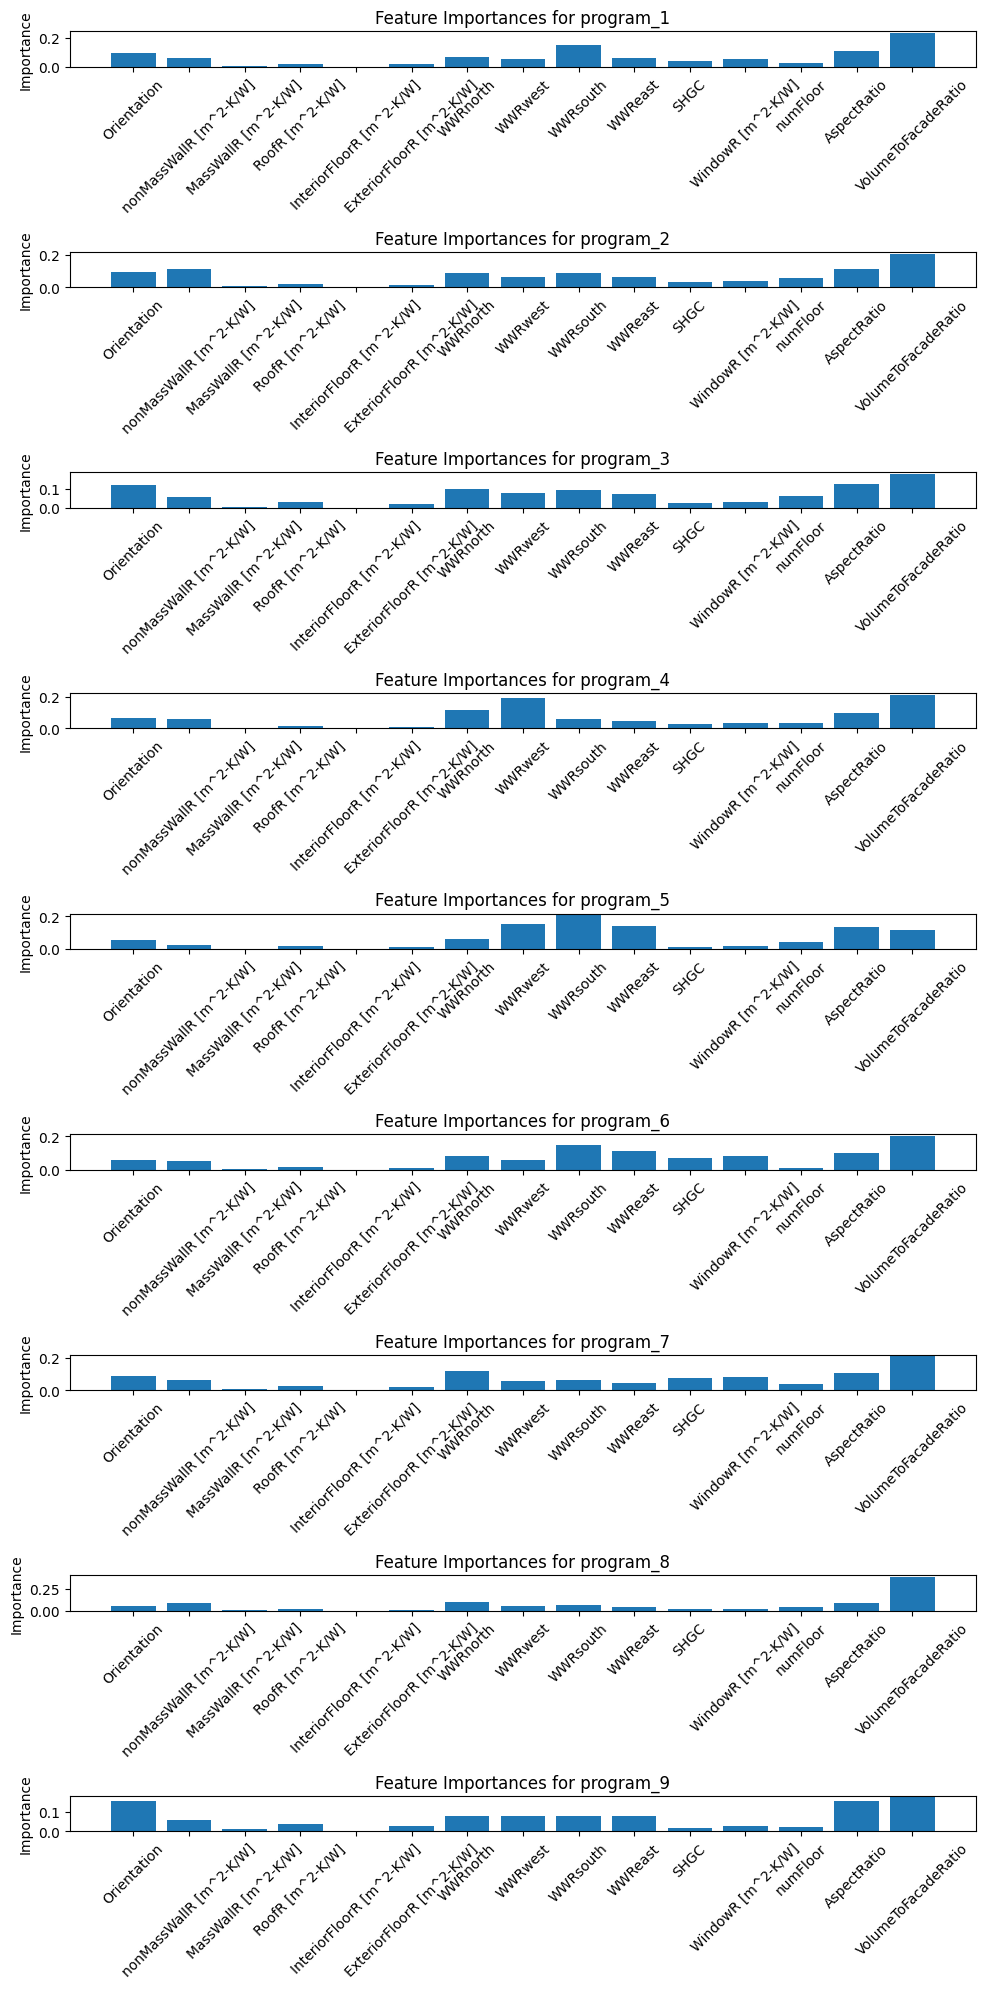

In [61]:
from sklearn.ensemble import RandomForestRegressor

program_columns = [col for col in df_sel.columns if col.startswith('program_')]

program_feature_importances = {}

continuous_features = [feature for feature in continuous_features if feature not in program_columns]

for program in program_columns:
    program_data = df_sel[df_sel[program] == 1]

    X_program = program_data[continuous_features]
    y_program = program_data['OE']

    X_program_std = StdScaler.fit_transform(X_program)

    model = RandomForestRegressor(random_state=42)
    model.fit(X_program_std, y_program)

    importances = model.feature_importances_
    program_feature_importances[program] = importances

#See Feature importance...plot
fig, axes = plt.subplots(nrows=len(program_feature_importances), ncols=1, figsize=(10, 20))

for i, program in enumerate(program_columns):
    axes[i].bar(continuous_features, program_feature_importances[program])
    axes[i].set_title(f'Feature Importances for {program}')
    axes[i].set_ylabel('Importance')
    axes[i].set_xticklabels(continuous_features, rotation=45)

plt.tight_layout()
plt.show()